In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('images/geo_shape.jpg')
imgGrey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(imgGrey,240,255,cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

cv2.imshow('img',img)
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    cv2.drawContours(img,[approx],0,(0,0,0),5)
    x = approx.ravel()[0]
    y = approx.ravel()[1]-5
    if len(approx)==3:
        print(approx)
        cv2.putText(img,"Traingle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx)==4:
        x1,y1,w,h = cv2.boundingRect(approx)
        aspectRatio = float(w)/h
        if aspectRatio >=0.95 and aspectRatio <= 1.05:
            cv2.putText(img,"Square",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
        else:
            cv2.putText(img,"Rectangle",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx)==5:
        cv2.putText(img,"Pentagon",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
    elif len(approx)==10:
        cv2.putText(img,"Star",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,0))
cv2.imshow("shapes",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[[258 252]]

 [[309 341]]

 [[207 340]]]


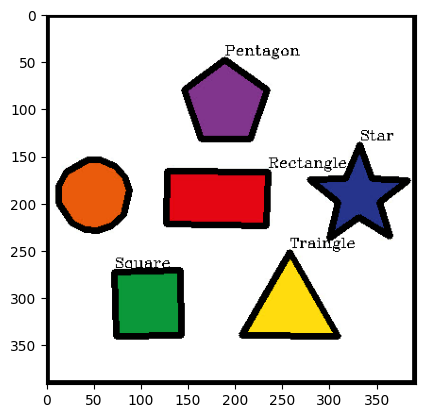

In [4]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))